# EDA for Titanic dataset

In [335]:
#import package 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np
from sklearn import tree

#read dataset as train
train = pd.read_csv('train.txt')

## View data

In [336]:
#training set has 891 observations, and 12 variables 
train.shape

(891, 12)

In [337]:
#delete columns that are useless 
del train["Name"]
del train['Ticket']
del train['PassengerId']
del train['Cabin']
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [338]:
#check variable types
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [339]:
#describe data for EDA
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Replace Missing values

In [340]:
#check the missingness
#Variable Age has 177 records-19.9% of missing values 
train.isnull().sum()
#2 missing values for Embarked, 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [341]:
#fill missing value in Age with mean 
#we don't fill missing values in Cabin becasue 77.1% missingness is too large-just ignore 
values = {"Age":train['Age'].mean()}
train.fillna(value=values, inplace=True).head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [342]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [343]:
#deal with the two nan values of embarked: delete the two rows
train = train.dropna(axis=0, how='any')

In [344]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [345]:
#group age into 3 intervals
train['Age'] = np.where(train['Age']<= 22, 'young', np.where(train['Age']<=35, 'middle','old'))
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,young,1,0,7.2500,S
1,1,1,female,old,1,0,71.2833,C
2,1,3,female,middle,0,0,7.9250,S
3,1,1,female,middle,1,0,53.1000,S
4,0,3,male,middle,0,0,8.0500,S


## Distribution of Categorical features

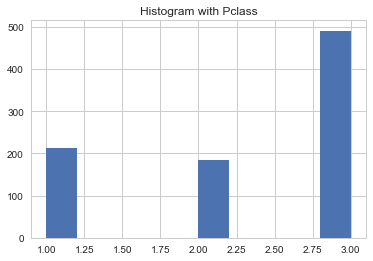

In [346]:
#barchart for some variables relate to numpy 
plt.hist(train['Pclass'])
plt.title("Histogram with Pclass")
plt.show()



## Distribution of Numerical Features

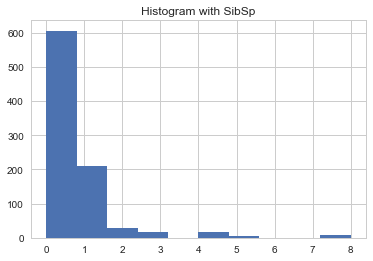

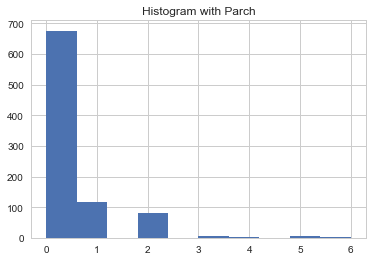

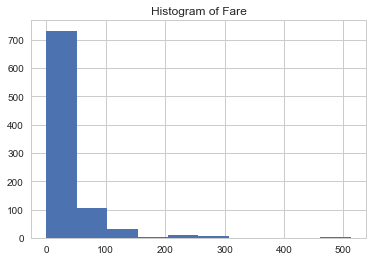

In [347]:
#create histograms of SibSp, Parch, Fare
plt.hist(train['SibSp'])
plt.title("Histogram with SibSp")
plt.show()

plt.hist(train['Parch'])
plt.title("Histogram with Parch")
plt.show()

plt.hist(train['Fare'])
plt.title('Histogram of Fare')
plt.show()



## Checking for Outliers

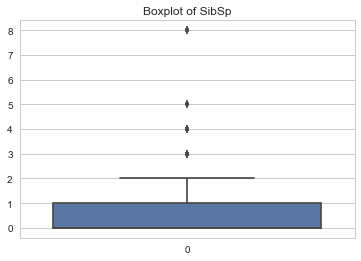

In [348]:
#create boxplot checking for outliers
sns.boxplot(data=train["SibSp"], orient="v").set_title('Boxplot of SibSp')
sns.plt.show()



## Understanding Survival 

In [349]:
#barcharts pclass, parch, sibsp, gender, embarked-survived,
#boxplots, age, fare - survived
survived_sex = pd.crosstab(index=train["Survived"],
                       columns=[train['Sex']])

survived_sex

Sex,female,male
Survived,,
0,81,468
1,231,109


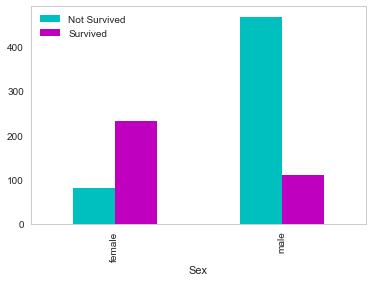

In [350]:
#create barchart to compare Survived with SEX
survived_sex.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['Not Survived','Survived'])

In [351]:
survived_pclass = pd.crosstab(index=train["Survived"],
                       columns=[train['Pclass']])

survived_pclass


Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


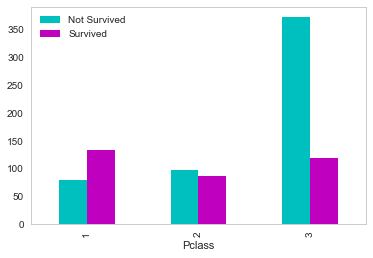

In [352]:
#create barchart to compare Survived with Pclass
survived_pclass.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['Not Survived','Survived'])

In [353]:
survived_embarked = pd.crosstab(index=train["Survived"],
                       columns=[train['Embarked']])
survived_embarked

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


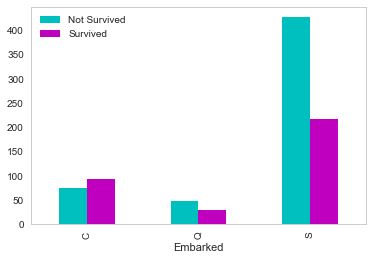

In [354]:
#create barchart to compare Survived with Embarked
survived_embarked.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['Not Survived','Survived'])

In [355]:
survived_parch = pd.crosstab(index=train["Survived"],
                       columns=[train['Parch']])
survived_parch

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,231,65,40,3,0,1,0


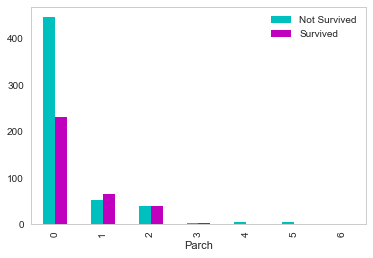

In [356]:
#create barchart to compare Survived with Parch
survived_parch.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['Not Survived','Survived'])

In [357]:
survived_sibsp = pd.crosstab(index=train["Survived"],
                       columns=[train['SibSp']])
survived_sibsp

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,208,112,13,4,3,0,0


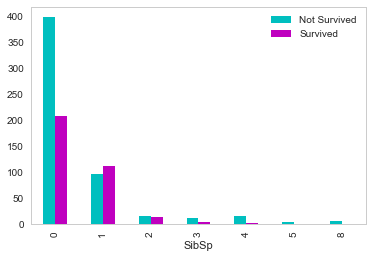

In [358]:
#create barchart to compare Survived with SibSp
survived_sibsp.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['Not Survived','Survived'])

## One-hot Encoding for 'Embarked' and 'Sex' and 'Age'


In [359]:
#one hot encoding on Embarked
one_hot = pd.get_dummies(train['Embarked'])
#drop the embarked column
train = train.drop('Embarked', axis=1)
#join the one hot encoding
train = train.join(one_hot)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,male,young,1,0,7.2500,0,0,1
1,1,1,female,old,1,0,71.2833,1,0,0
2,1,3,female,middle,0,0,7.9250,0,0,1
3,1,1,female,middle,1,0,53.1000,0,0,1
4,0,3,male,middle,0,0,8.0500,0,0,1


In [360]:
#convert sex to 01 with 1=male and 0=female
#convert sex to 01 with 1=male and 0=female
train['Sex'] = train['Sex'].apply({'male':1,'female':0}.get)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,young,1,0,7.2500,0,0,1
1,1,1,0,old,1,0,71.2833,1,0,0
2,1,3,0,middle,0,0,7.9250,0,0,1
3,1,1,0,middle,1,0,53.1000,0,0,1
4,0,3,1,middle,0,0,8.0500,0,0,1


In [361]:
#one hot encoding for Age
train['Age'] = train['Age'].apply({'young':1,'middle':2,'old':3}.get)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,1,1,0,7.2500,0,0,1
1,1,1,0,3,1,0,71.2833,1,0,0
2,1,3,0,2,0,0,7.9250,0,0,1
3,1,1,0,2,1,0,53.1000,0,0,1
4,0,3,1,2,0,0,8.0500,0,0,1


In [362]:
#one hot encoding for Fare
cheap = np.percentile(train['Fare'], 25)
expensive = np.percentile(train['Fare'], 75)
train['Fare'] = np.where(train['Fare']<= cheap, 1, np.where(train['Fare']>=expensive, 3,2))
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,1,1,0,1,0,0,1
1,1,1,0,3,1,0,3,1,0,0
2,1,3,0,2,0,0,2,0,0,1
3,1,1,0,2,1,0,3,0,0,1
4,0,3,1,2,0,0,2,0,0,1


## Correlation Matrix

In [363]:
# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
variables = ['Pclass','SibSp','Fare','Sex','C','Q','S']
target = 'Survived'
cm = np.corrcoef(train[variables + [target]].T)


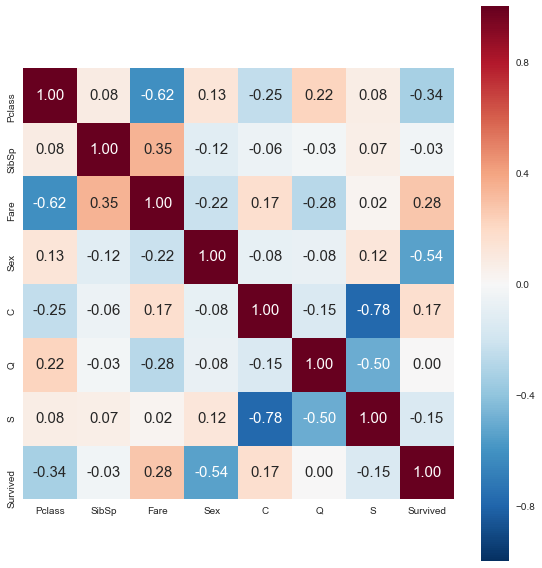

In [364]:
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

## get X_test,X_train,y_train

In [365]:
# Specify the name of the target
target = 'Survived'

# Get the target vector
y_train= train[target]

# Specify the name of the features
features = list(train.drop(target, axis=1).columns)

# Get the feature vector
X_train= train[features]

In [366]:
#read test data 
test_1= pd.read_csv('test.csv')
test=pd.read_csv('test.csv')

In [367]:
#one hot encoding on Embarked
one_hot = pd.get_dummies(test['Embarked'])
#drop the embarked column
test = test.drop('Embarked', axis=1)
#join the one hot encoding
test = test.join(one_hot)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [368]:
#Name column is useless to us, drop it
del test["Name"]
del test['Ticket']
del test['PassengerId']
del test['Cabin']
test.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,male,34.5,0,0,7.8292,0,1,0
1,3,female,47.0,1,0,7.0000,0,0,1
2,2,male,62.0,0,0,9.6875,0,1,0
3,3,male,27.0,0,0,8.6625,0,0,1
4,3,female,22.0,1,1,12.2875,0,0,1


In [369]:
test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
C          0
Q          0
S          0
dtype: int64

In [370]:
#replace missing value with mean for age and fare 
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [371]:
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
dtype: int64

In [372]:
#convert sex to 01 with 1=male and 0=female
test['Sex'] = test['Sex'].apply({'male':1,'female':0}.get)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [373]:
#group age into 3 intervals
test['Age'] = np.where(test['Age']<= 23, 'young', np.where(test['Age']<=36, 'middle','old'))
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,middle,0,0,7.8292,0,1,0
1,3,0,old,1,0,7.0000,0,0,1
2,2,1,old,0,0,9.6875,0,1,0
3,3,1,middle,0,0,8.6625,0,0,1
4,3,0,young,1,1,12.2875,0,0,1


In [374]:
#one hot encoding for age
test['Age'] = test['Age'].apply({'young':1,'middle':2,'old':3}.get)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,2,0,0,7.8292,0,1,0
1,3,0,3,1,0,7.0000,0,0,1
2,2,1,3,0,0,9.6875,0,1,0
3,3,1,2,0,0,8.6625,0,0,1
4,3,0,1,1,1,12.2875,0,0,1


In [375]:
#one hot encoding for Fare
cheap = np.percentile(test['Fare'], 25)
expensive = np.percentile(test['Fare'], 75)
test['Fare'] = np.where(test['Fare']<= cheap, 1, np.where(test['Fare']>=expensive, 3,2))
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,2,0,0,1,0,1,0
1,3,0,3,1,0,1,0,0,1
2,2,1,3,0,0,2,0,1,0
3,3,1,2,0,0,2,0,0,1
4,3,0,1,1,1,2,0,0,1


In [376]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.0,1.0,3.0,3.0,3.0
Sex,418.0,0.636364,0.481622,0.0,0.0,1.0,1.0,1.0
Age,418.0,1.956938,0.708335,1.0,1.0,2.0,2.0,3.0
SibSp,418.0,0.447368,0.896760,0.0,0.0,0.0,1.0,8.0
Parch,418.0,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Fare,418.0,1.980861,0.726093,1.0,1.0,2.0,3.0,3.0
C,418.0,0.244019,0.430019,0.0,0.0,0.0,0.0,1.0
Q,418.0,0.110048,0.313324,0.0,0.0,0.0,0.0,1.0
S,418.0,0.645933,0.478803,0.0,0.0,1.0,1.0,1.0


In [377]:
# Specify the name of the features
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S']
# Get the feature vector
X_test= test[features]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,2,0,0,1,0,1,0
1,3,0,3,1,0,1,0,0,1
2,2,1,3,0,0,2,0,1,0
3,3,1,2,0,0,2,0,0,1
4,3,0,1,1,1,2,0,0,1


### Feature Importance (random forest)

In [378]:
#import machine learning packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [379]:
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
rf.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

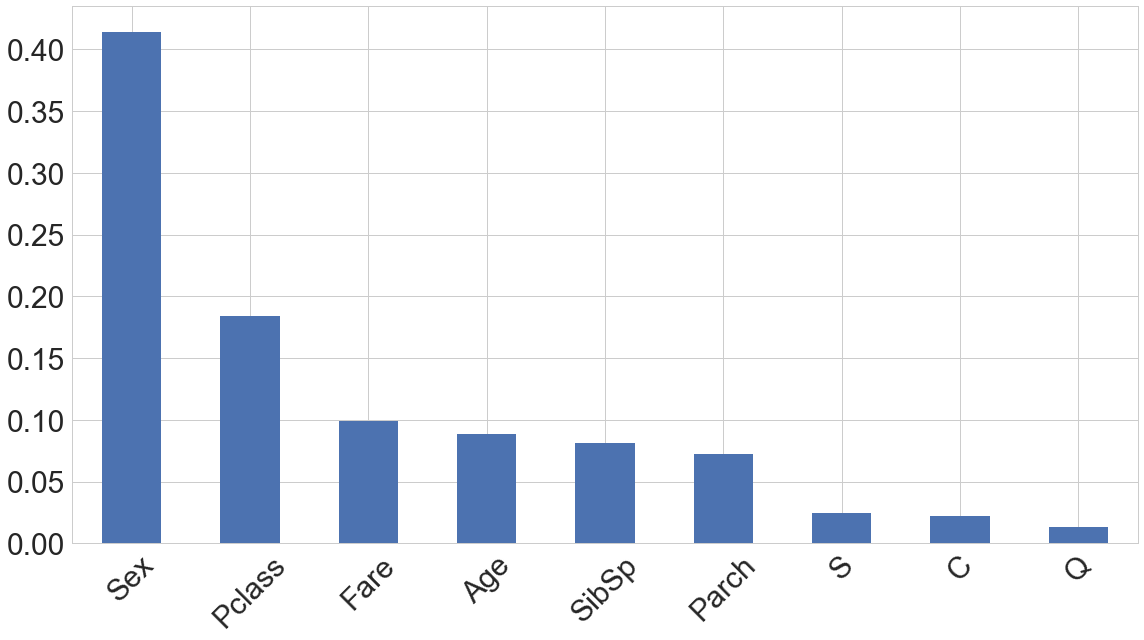

In [380]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, X_train.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

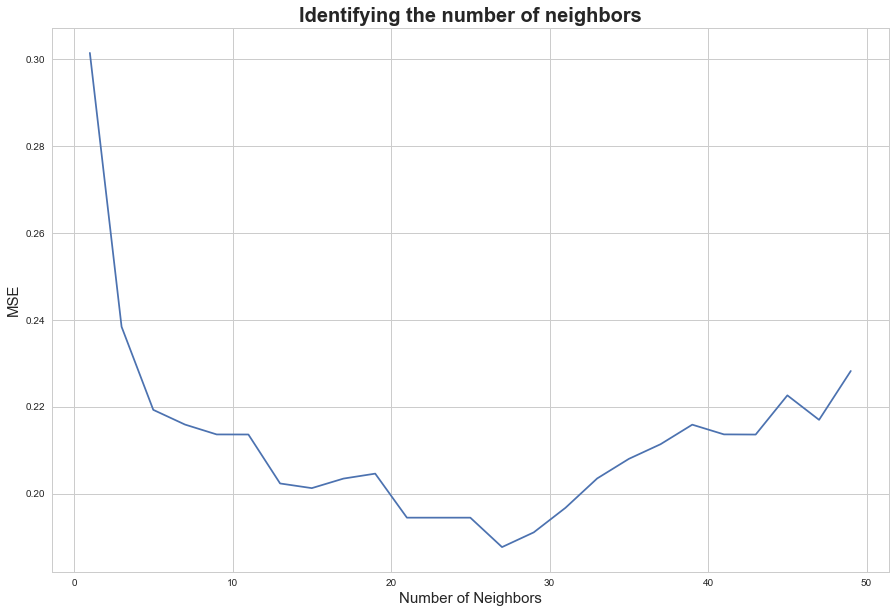

In [381]:
#choose the best n_neighbors for KNN

from sklearn.model_selection import cross_val_score
#try to plot KNN
#creating list of K for KNN
k_list = list(range(1,50,2))
# create a new list called cv_scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# find MSE
MSE = [1 - x for x in cv_scores]
#make a plot
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Identifying the number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('MSE', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

#the lowest MSE is in the range of 25 to 30, so when we do the paramter tuning, we should 
#try the n_neighbors in this range

### GridSearch (RF, SVC, KNN)

In [382]:
#create dictionary of classifiers 
clfs = {'knn': KNeighborsClassifier(),
       'rf': RandomForestClassifier(random_state=0),
       'svc': SVC(random_state=0)}

In [384]:
#create pipline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [385]:
#create parameter grid
param_grids = {}

In [386]:
#create parameter grid for KNN
param_grid = [{'clf__n_neighbors': [10,20,30], 
               'clf__algorithm':['auto','brute','kd_tree','ball_tree']}]
param_grids['knn'] = param_grid

In [387]:
#create parameter grid for random forest
param_grid = [{'clf__n_estimators': [40,45,50],
              'clf__min_samples_split': [5, 8,10],
               'clf__min_samples_leaf': [1, 2, 3]}]

param_grids['rf'] = param_grid

In [388]:
#create parameter grid for SVC
param_grid = [{'clf__C': [ 3,4,5],
               'clf__gamma': [0.1, 0.3, 0.5],
               'clf__kernel': ['linear', 'rbf', 'sigmoid']}]

param_grids['svc'] = param_grid

In [389]:
#perform gridsearch on different models with different parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [390]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.82227221597300337, {'clf__C': 4, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}, <class 'sklearn.svm.classes.SVC'>]

[0.81777277840269968, {'clf__algorithm': 'brute', 'clf__n_neighbors': 10}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.81777277840269968, {'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 40}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]



In [391]:
#predict target based on best model
y_pred = best_score_param_estimators[0][2].predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [392]:
#create a correct datafile for kaggle submission - includes PassengerID and predict results
PassengerId = pd.DataFrame(test_1.iloc[:,:1])
Results = pd.DataFrame(y_pred)
Final = pd.concat([PassengerId, Results], axis=1)
Final.columns = ['PassengerId', 'Survived']

In [393]:
#view the datafile
Final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [394]:
#export the result as csv for kaggle submission
Final.to_csv('best_model_results.csv')

### Random Forest Tree Visualization

In [395]:
#change the directory to get the png decision tree file 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=20, n_jobs=1,max_depth=4)
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree1.dot', 
                feature_names = list(X_train.columns),
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### SVC plot

In [396]:
#create a new dataframe for SVC plot

df = pd.read_csv("train.txt")

#data pre-processing
values = {"Age":df['Age'].mean()}
df.fillna(value=values, inplace=True)

df['Sex'] = df['Sex'].apply({'male':1,'female':0}.get)

#deal with the two nan values of embarked: delete the two rows
df = df.dropna(axis=0, how='any')


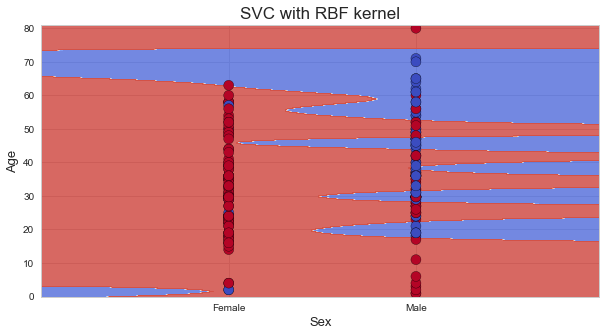

In [397]:
#graph the SVC
#code mainly taken from this site:
#https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Select two features of interst.
X = df[['Sex', 'Age']]
y = df['Survived']

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
model = svm.SVC(kernel='rbf', gamma=0.1, C=3)
model = model.fit(X, y)

# title for the plots
title = 'SVC with RBF kernel'

# Set-up plot
fig, ax = plt.subplots(figsize=(10,5))

X0, X1 = X['Sex'], X['Age']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sex', fontsize = 13)
ax.set_ylabel('Age', fontsize = 13)
ax.set_xticks(range(2))
ax.set_xticklabels(['Female', 'Male'])
ax.set_yticks(range(50), 2)
ax.set_title(title, fontsize=17)

plt.show()